<a href="https://colab.research.google.com/github/edwardchome/ml_deeplearning/blob/main/introducing_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
import pylab as pl

digits = load_digits()

<Figure size 432x288 with 0 Axes>

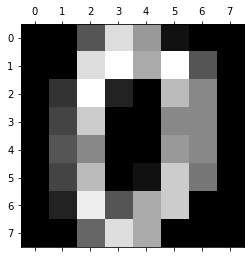

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
pl.gray()

pl.matshow(digits.images[0])
pl.show()
digits.images[0]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [7]:
y = digits.target
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))

In [12]:
x.shape

(1797, 64)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1437, 64)
(360, 64)


In [20]:
gnb = GaussianNB()
fit = gnb.fit(x_train,y_train)
predicted = fit.predict(x_test)

confusion_matrix(y_test,predicted)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 17,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  1, 24,  0,  0,  0,  0,  4,  0],
       [ 0,  1,  0,  0, 22,  0,  0,  7,  0,  0],
       [ 0,  1,  0,  0,  0, 35,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  5,  0,  0,  0,  1,  0,  1, 32,  0],
       [ 0,  2,  0,  3,  0,  0,  0,  3,  7, 26]])

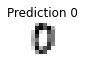

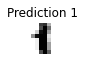

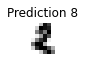

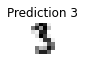

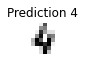

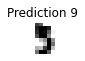

In [21]:
images_and_predictions = list(zip(digits.images,fit.predict(x)))

for index, (image,prediction) in enumerate(images_and_predictions[:6]):
 pl.subplot(6, 3, index +5)
 pl.axis('off')
 pl.imshow(image,cmap=pl.cm.gray_r, interpolation='nearest')
 pl.title('Prediction %i' % prediction)
 pl.show()
